In [50]:
import pandas as pd
from tqdm import tqdm
import numpy as np

In [2]:
table = pd.read_csv("one-million-reddit-jokes.csv")

In [6]:
table.head(10)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,ftbp1i,2qh72,jokes,False,1585785543,https://old.reddit.com/r/Jokes/comments/ftbp1i...,self.jokes,NaN,My corona is covered with foreskin so it is no...,I am soooo glad I'm not circumcised!,2
1,post,ftboup,2qh72,jokes,False,1585785522,https://old.reddit.com/r/Jokes/comments/ftboup...,self.jokes,NaN,It's called Google Sheets.,Did you know Google now has a platform for rec...,9
2,post,ftbopj,2qh72,jokes,False,1585785508,https://old.reddit.com/r/Jokes/comments/ftbopj...,self.jokes,NaN,The vacuum doesn't snore after sex.\n\n&amp;#x...,What is the difference between my wife and my ...,15
3,post,ftbnxh,2qh72,jokes,False,1585785428,https://old.reddit.com/r/Jokes/comments/ftbnxh...,self.jokes,NaN,[removed],My last joke for now.,9
4,post,ftbjpg,2qh72,jokes,False,1585785009,https://old.reddit.com/r/Jokes/comments/ftbjpg...,self.jokes,NaN,[removed],The Nintendo 64 turns 18 this week...,134
5,post,ftbjjw,2qh72,jokes,False,1585784995,https://old.reddit.com/r/Jokes/comments/ftbjjw...,self.jokes,NaN,[removed],Sex with teacher.,1
6,post,ftbg6a,2qh72,jokes,False,1585784651,https://old.reddit.com/r/Jokes/comments/ftbg6a...,self.jokes,NaN,[removed],Another long one.,8
7,post,ftbeb4,2qh72,jokes,False,1585784461,https://old.reddit.com/r/Jokes/comments/ftbeb4...,self.jokes,NaN,Oo..lala...,What did the French man say to the attractive ...,2
8,post,ftbdej,2qh72,jokes,False,1585784367,https://old.reddit.com/r/Jokes/comments/ftbdej...,self.jokes,NaN,[removed],A Priest takes a walk down to the docks one day,88
9,post,ftbc7z,2qh72,jokes,False,1585784246,https://old.reddit.com/r/Jokes/comments/ftbc7z...,self.jokes,NaN,[removed],A long joke.,4


In [11]:
table = table.drop(table[(table.selftext == '[removed]')|(table.selftext =='[deleted]')].index)

In [54]:
raw_data = table.loc[:,['selftext','title']]

In [20]:
raw_data['len'] = len(raw_data.selftext)

In [55]:
raw_data

,selftext,title
0,My corona is covered with foreskin so it is no...,I am soooo glad I'm not circumcised!
1,It's called Google Sheets.,Did you know Google now has a platform for rec...
2,The vacuum doesn't snore after sex.\n\n&amp;#x...,What is the difference between my wife and my ...
7,Oo..lala...,What did the French man say to the attractive ...
10,"Yo momma's so fat, that when she went to the z...",Yo Mama
...,...,...
999992,Q: What do you call a lawyer who has gone bad?...,BAD LAWYER
999994,Supposedly she had to rush the delivery!,Did you hear about the FedEx lady who had a ba...
999995,*zyan malik or whatever leaves 1d. \n*Kayne W...,With Zyan Malik leaving 1D..
999997,I'll be Bach,What did Arnold Schwarzenegger say when invite...


In [56]:

raw_data = raw_data.dropna()

In [57]:
raw_data

,selftext,title
0,My corona is covered with foreskin so it is no...,I am soooo glad I'm not circumcised!
1,It's called Google Sheets.,Did you know Google now has a platform for rec...
2,The vacuum doesn't snore after sex.\n\n&amp;#x...,What is the difference between my wife and my ...
7,Oo..lala...,What did the French man say to the attractive ...
10,"Yo momma's so fat, that when she went to the z...",Yo Mama
...,...,...
999992,Q: What do you call a lawyer who has gone bad?...,BAD LAWYER
999994,Supposedly she had to rush the delivery!,Did you hear about the FedEx lady who had a ba...
999995,*zyan malik or whatever leaves 1d. \n*Kayne W...,With Zyan Malik leaving 1D..
999997,I'll be Bach,What did Arnold Schwarzenegger say when invite...


In [58]:
raw_data.to_csv("filtered_joke.csv")

In [38]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')


In [64]:
length = []
for i in tqdm(range(raw_data.shape[0])):
    length.append(len(tokenizer(raw_data.iloc[i,0], truncation=True).input_ids))

100%|██████████| 574162/574162 [01:30<00:00, 6321.74it/s]


In [65]:
lengthtitle = []
for i in tqdm(range(raw_data.shape[0])):
    lengthtitle.append(len(tokenizer(raw_data.iloc[i,1], truncation=True).input_ids))

100%|██████████| 574162/574162 [00:58<00:00, 9751.28it/s] 


In [43]:
raw_data.iloc[531,0]

nan

(array([470138.,  35342.,  20688.,  15559.,  11139.,   6997.,   4629.,
          2923.,   1894.,   4853.]),
 array([  2.,  53., 104., 155., 206., 257., 308., 359., 410., 461., 512.]),
 <BarContainer object of 10 artists>)

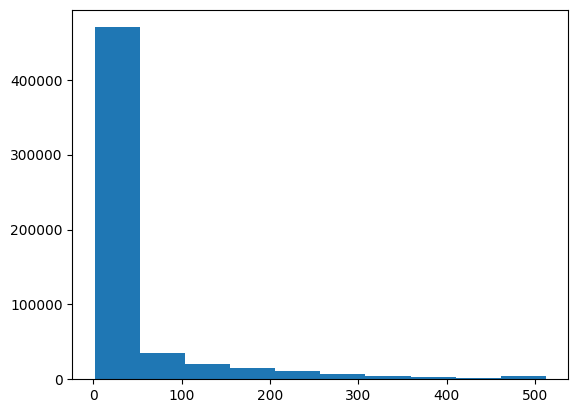

In [66]:
import matplotlib.pyplot as plt
plt.hist(length)


(array([3.66539e+05, 1.89888e+05, 1.40490e+04, 2.34800e+03, 9.25000e+02,
        3.53000e+02, 5.40000e+01, 4.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([  2. ,  14.7,  27.4,  40.1,  52.8,  65.5,  78.2,  90.9, 103.6,
        116.3, 129. ]),
 <BarContainer object of 10 artists>)

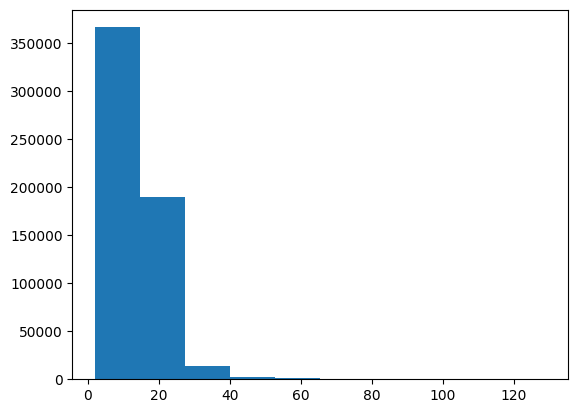

In [67]:
plt.hist(lengthtitle)

In [63]:
lengthtitle

[]

In [52]:
np.save("lengthtable",np.array(length))